In [331]:
import numpy as np 
import pywt
from scipy.ndimage import median_filter 
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd 

In [332]:
df = pd.read_csv(r'C:\Users\alema\Desktop\AN3\SBC\PROIECT\RainGarden.csv') 

print(df.columns) 

Index(['Time', 'wfv_1', 'wfv_2', 'wfv_3'], dtype='object')


In [333]:
import seaborn as sns

In [334]:
data = pd.read_csv(r'C:\Users\alema\Desktop\AN3\SBC\PROIECT\RainGarden.csv') 

print(data.head()) 

              Time      wfv_1      wfv_2      wfv_3
0  3/23/2022 11:15  27.131645  22.632761  23.291329
1  3/23/2022 11:30  27.131645  22.446199  23.292771
2  3/23/2022 11:45  27.177793  22.634226  23.292771
3  3/23/2022 12:00  27.177793  22.446199  23.292771
4  3/23/2022 12:15  27.180429  22.446199  23.292771


In [335]:
# shape of the data 
data.shape

(14889, 4)

In [336]:
#data information  
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14889 entries, 0 to 14888
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    14889 non-null  object 
 1   wfv_1   14887 non-null  float64
 2   wfv_2   14887 non-null  float64
 3   wfv_3   14887 non-null  float64
dtypes: float64(3), object(1)
memory usage: 465.4+ KB


In [337]:
# describing the data 
data.describe()

,wfv_1,wfv_2,wfv_3
count,14887.000000,14887.000000,14887.000000
mean,23.428592,19.452768,19.433692
std,7.816484,5.720389,6.127542
min,10.159827,8.730375,7.365908
25%,18.195297,15.673062,14.156935
50%,24.643525,20.572522,21.145741
75%,27.861830,23.200372,23.791609
max,53.737964,55.996051,50.350888


In [338]:
#column to list  
data.columns.tolist()

['Time', 'wfv_1', 'wfv_2', 'wfv_3']

In [339]:
data.isnull().sum() 

Time     0
wfv_1    2
wfv_2    2
wfv_3    2
dtype: int64

In [340]:
data.nunique() 

Time     14887
wfv_1     6575
wfv_2     5430
wfv_3     5860
dtype: int64

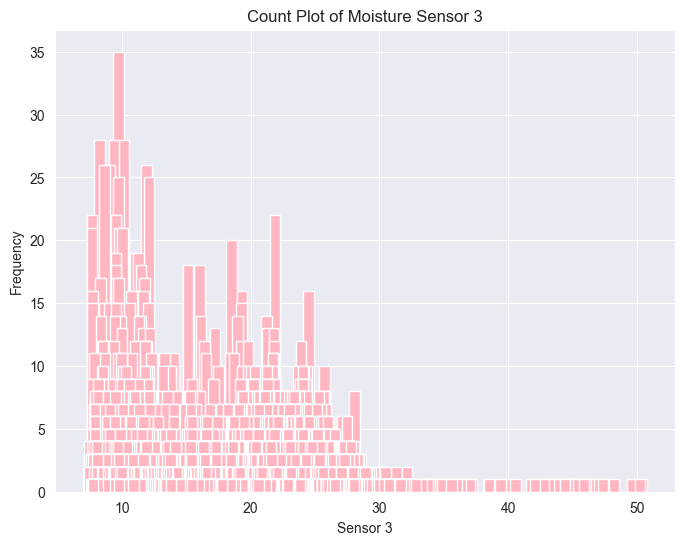

In [341]:
data = pd.read_csv(r'C:\Users\alema\Desktop\AN3\SBC\PROIECT\RainGarden.csv') 
moisture_sensor3 = data['wfv_3'].value_counts() 
plt.figure(figsize=(8, 6)) 
plt.bar(moisture_sensor3.index, moisture_sensor3, color='lightpink') 
plt.title('Count Plot of Moisture Sensor 3') 
plt.xlabel('Sensor 3') 
plt.ylabel('Frequency') 
plt.show() 

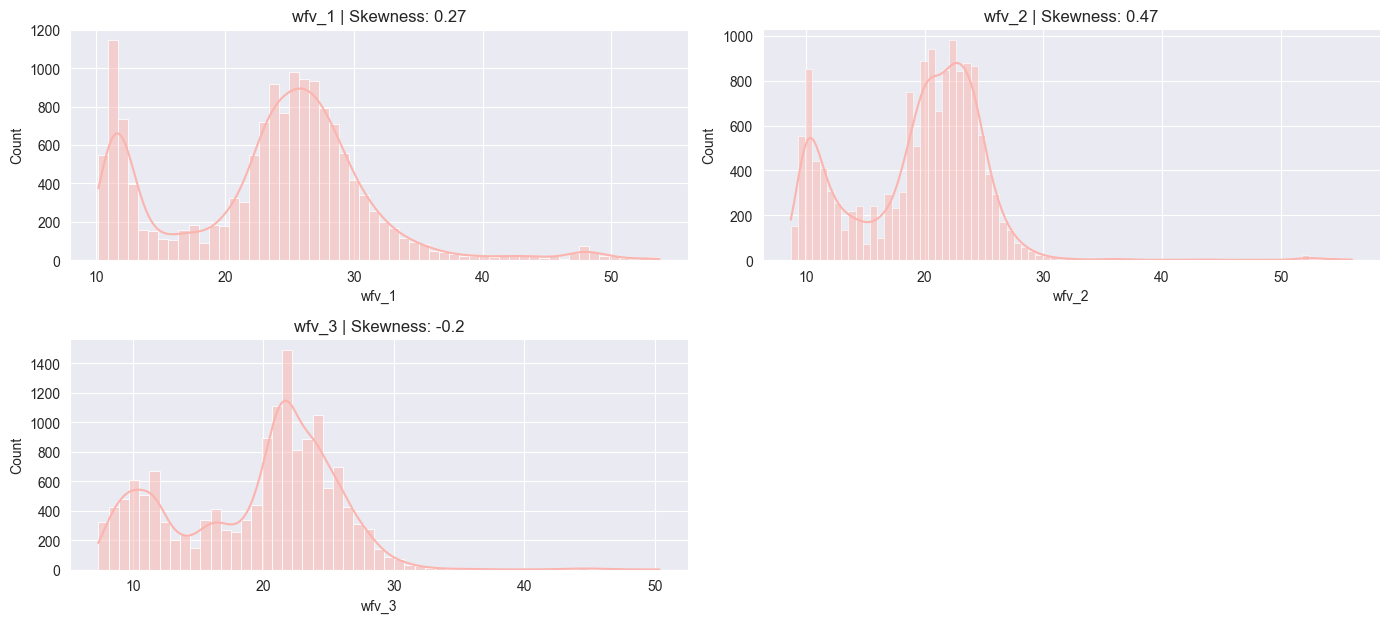

In [342]:
sns.set_style("darkgrid") 

numerical_columns = data.select_dtypes(include=["int64", "float64"]).columns 

plt.figure(figsize=(14, len(numerical_columns) * 3)) 
for idx, feature in enumerate(numerical_columns, 1): 
 plt.subplot(len(numerical_columns), 2, idx) 
 sns.histplot(data[feature], kde=True) 
 plt.title(f"{feature} | Skewness: {round(data[feature].skew(), 2)}") 
    
plt.tight_layout() 
plt.show() 

<Figure size 1000x600 with 0 Axes>

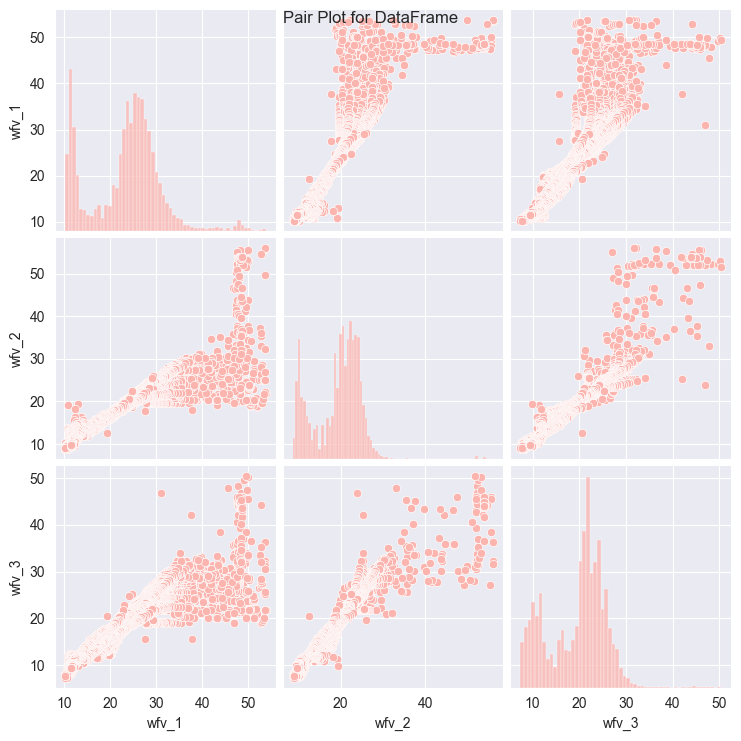

In [343]:
# Set the color palette 
sns.set_palette("Pastel1") 
# Assuming 'df' is your DataFrame 
plt.figure(figsize=(10, 6)) 
# Using Seaborn to create a pair plot with the specified color palette 
sns.pairplot(data) 
plt.suptitle('Pair Plot for DataFrame') 
plt.show() 

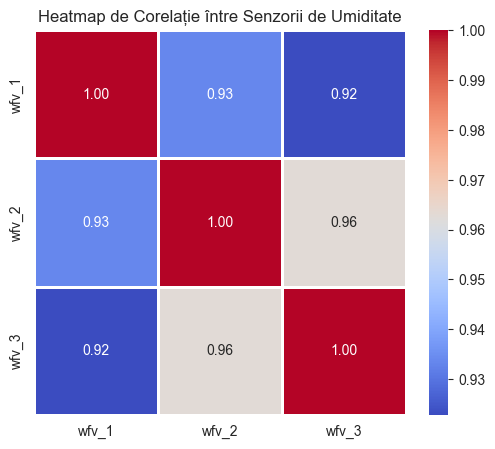

In [344]:
# ANALIZA MULTIVARIATA
sensor_columns = ['wfv_1', 'wfv_2', 'wfv_3']
data_sensors = data[sensor_columns]
correlation_matrix = data_sensors.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=2)
plt.title("Heatmap de Corelație între Senzorii de Umiditate")
plt.show()


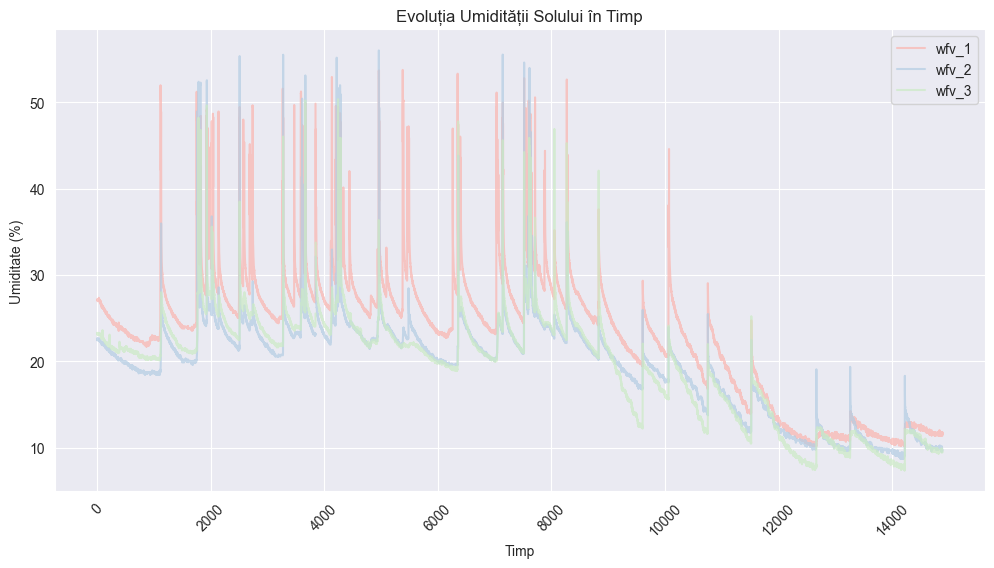

In [345]:
#analiza temporala
data['Time'] = pd.to_datetime(data['Time'], errors='coerce')
data.set_index('Time', inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(df.index, data['wfv_1'], label='wfv_1', alpha=0.7)
plt.plot(df.index, data['wfv_2'], label='wfv_2', alpha=0.7)
plt.plot(df.index, data['wfv_3'], label='wfv_3', alpha=0.7)

plt.xlabel("Timp")
plt.ylabel("Umiditate (%)")
plt.title("Evoluția Umidității Solului în Timp")
plt.legend()
plt.xticks(rotation=45)
plt.show()


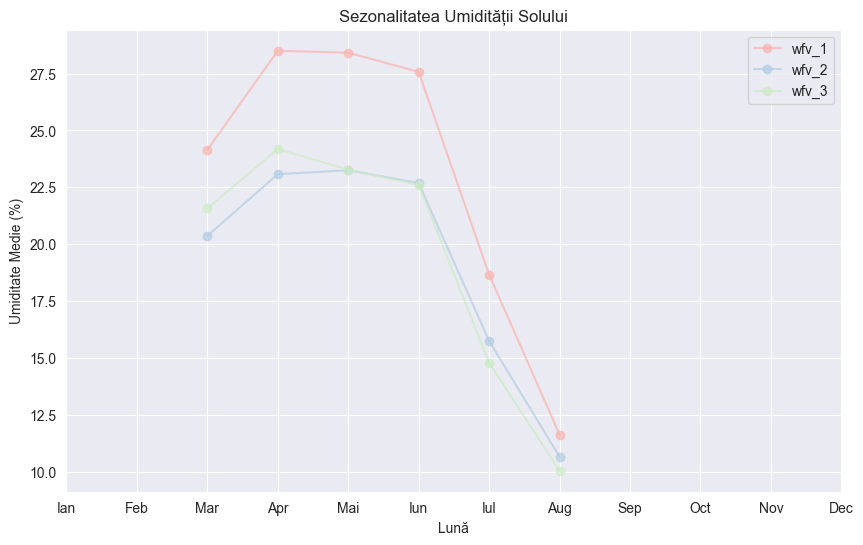

In [346]:
data['Hour'] = data.index.hour  # Extragem luna din coloana de timp
data['Day'] = data.index.day 
data['Month'] = data.index.month 
monthly_avg = data.groupby('Month')[['wfv_1', 'wfv_2', 'wfv_3']].mean()

# Crearea graficului de sezonalitate
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg.index, monthly_avg['wfv_1'], marker='o', label='wfv_1', alpha=0.7)
plt.plot(monthly_avg.index, monthly_avg['wfv_2'], marker='o', label='wfv_2', alpha=0.7)
plt.plot(monthly_avg.index, monthly_avg['wfv_3'], marker='o', label='wfv_3', alpha=0.7)

# Configurarea graficului
plt.xlabel("Lună")
plt.ylabel("Umiditate Medie (%)")
plt.title("Sezonalitatea Umidității Solului")
plt.xticks(ticks=range(1, 13), labels=[
    "Ian", "Feb", "Mar", "Apr", "Mai", "Iun", "Iul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend()
plt.grid(True)
plt.show()


In [347]:
# LAB4                              PREPROCESARE DATE 2

In [348]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy import signal 
from scipy.ndimage import median_filter 
import pywt 

In [349]:
# DENOISING

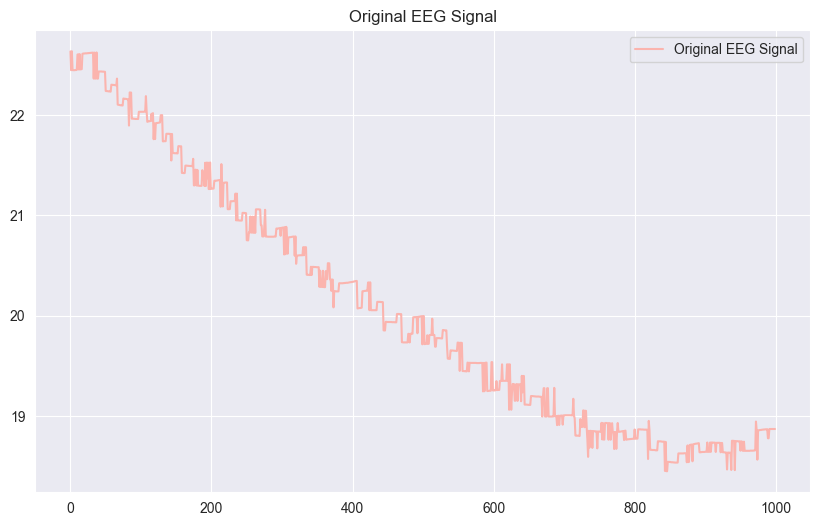

In [350]:
eeg_signal = data['wfv_2'].values[:1000]   
time = np.arange(len(eeg_signal))  
 
plt.figure(figsize=(10, 6)) 
plt.plot(time, eeg_signal, label='Original EEG Signal') 
plt.title("Original EEG Signal") 
plt.legend() 
plt.show() 

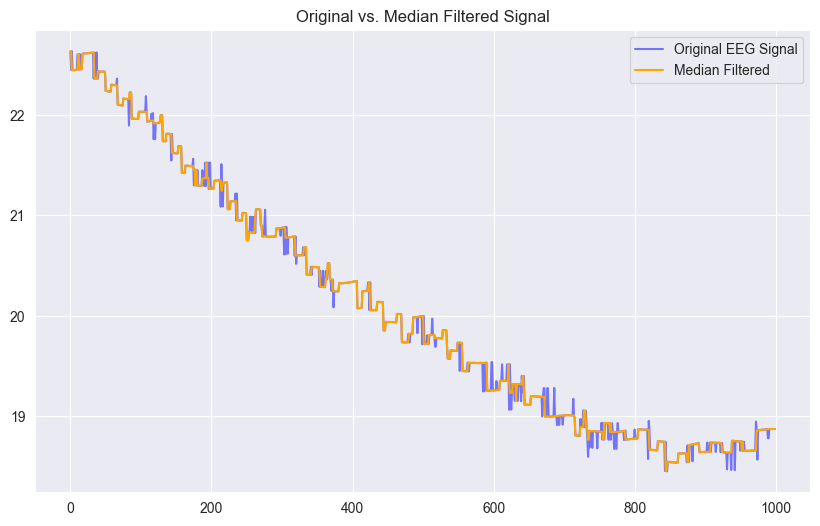

In [351]:
#Median filter 
def apply_median_filter(data, size=5): 
    filtered_data = median_filter(data, size=size) 
     
    # Plotting 
    plt.figure(figsize=(10, 6)) 
    plt.plot(time, eeg_signal, label='Original EEG Signal', color='blue', alpha=0.5) 
    plt.plot(time, filtered_data, label='Median Filtered', color='orange') 
    plt.title('Original vs. Median Filtered Signal') 
    plt.legend() 
    plt.show() 
     
    return filtered_data 
 
# Apply filters and plot results 
sampling_rate = 256  # Hz, assuming EEG is sampled at 256 Hz
cutoff = 40  # Hz, as EEG signals of interest are typically below this frequency 
 
# Apply each filter and visualize immediately 
median_filtered = apply_median_filter(eeg_signal) 

In [352]:
#                                       DIMENSIONALITY REDUCTION

In [353]:
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [354]:
#                                       INTERPOLARE

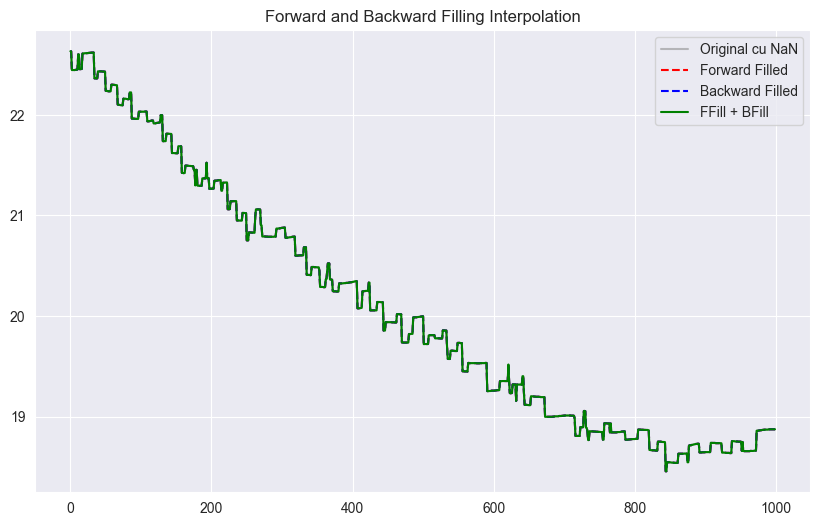

In [355]:
median_filtered_series = pd.Series(median_filtered)
eeg_ffill = median_filtered_series.ffill()  # Forward Fill
eeg_bfill = median_filtered_series.bfill()  # Backward Fill
eeg_ffill_bfill = median_filtered_series.ffill().bfill()
plt.figure(figsize=(10, 6))
plt.plot(time, median_filtered_series, label="Original cu NaN", color='gray', alpha=0.5)
plt.plot(time, eeg_ffill, label="Forward Filled", color='red', linestyle='--')
plt.plot(time, eeg_bfill, label="Backward Filled", color='blue', linestyle='--')
plt.plot(time, eeg_ffill_bfill, label="FFill + BFill", color='green')
plt.title("Forward and Backward Filling Interpolation")
plt.legend()
plt.show()


In [356]:
#                                              DETRENDING

In [357]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import signal 
from scipy.fft import fft, ifft 

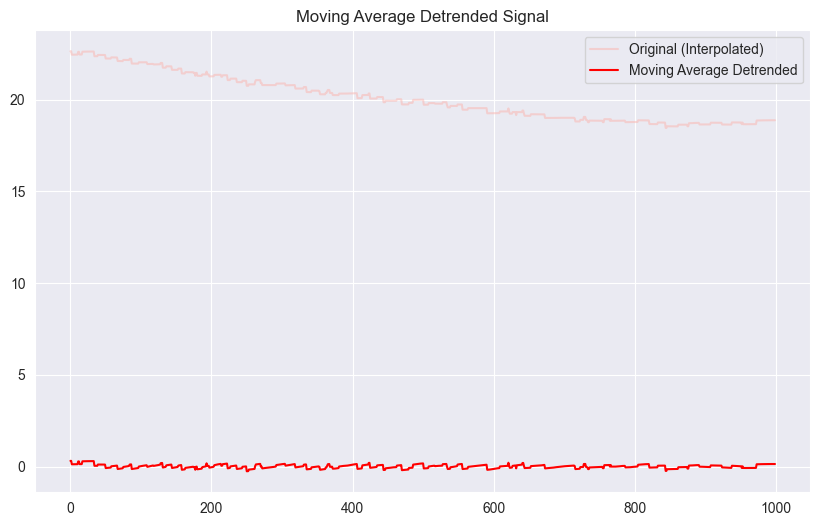

In [358]:
window_size = 100  
moving_avg = eeg_ffill_bfill.rolling(window=window_size, center=True).mean()
moving_avg = moving_avg.bfill().ffill()
detrended_moving_avg = eeg_ffill_bfill - moving_avg
plt.figure(figsize=(10, 6))
plt.plot(time, eeg_ffill_bfill, label="Original (Interpolated)", alpha=0.5)
plt.plot(time, detrended_moving_avg, label="Moving Average Detrended", color='red')
plt.title("Moving Average Detrended Signal")
plt.legend()
plt.show()



In [359]:
#                                      OUTLIER REMOVAL

In [360]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import zscore, median_abs_deviation 
from sklearn.ensemble import IsolationForest 
from sklearn.cluster import DBSCAN 

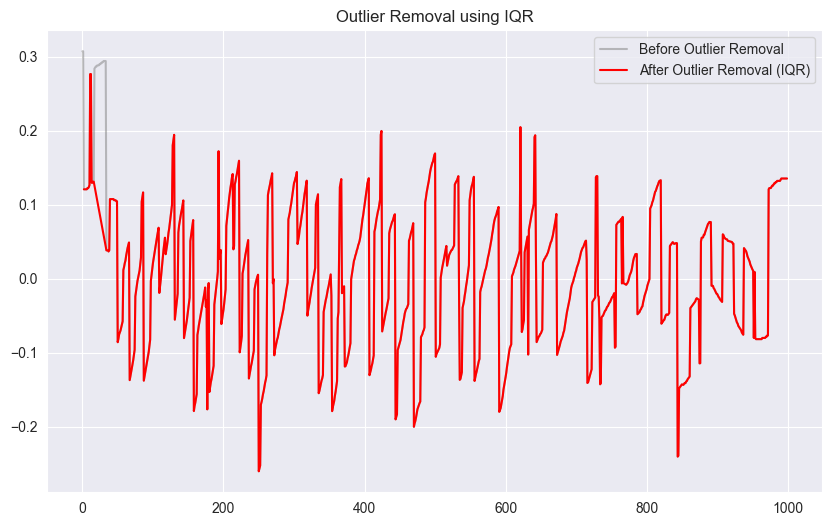

In [361]:
### 2. IQR Method 
Q1, Q3 = np.percentile(detrended_moving_avg.dropna(), [25, 75])
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
detrended_no_outliers = detrended_moving_avg[(detrended_moving_avg >= lower_bound) & (detrended_moving_avg <= upper_bound)]
detrended_no_outliers = detrended_no_outliers.interpolate(method='linear')
valid_indices = detrended_no_outliers.index
plt.figure(figsize=(10, 6))
plt.plot(time, detrended_moving_avg, label="Before Outlier Removal", alpha=0.5, color='gray')
plt.plot(time[valid_indices], detrended_no_outliers, label="After Outlier Removal (IQR)", color='red')
plt.legend()
plt.title("Outlier Removal using IQR")
plt.show()


In [362]:
detrended_no_outliers = detrended_no_outliers.drop_duplicates()


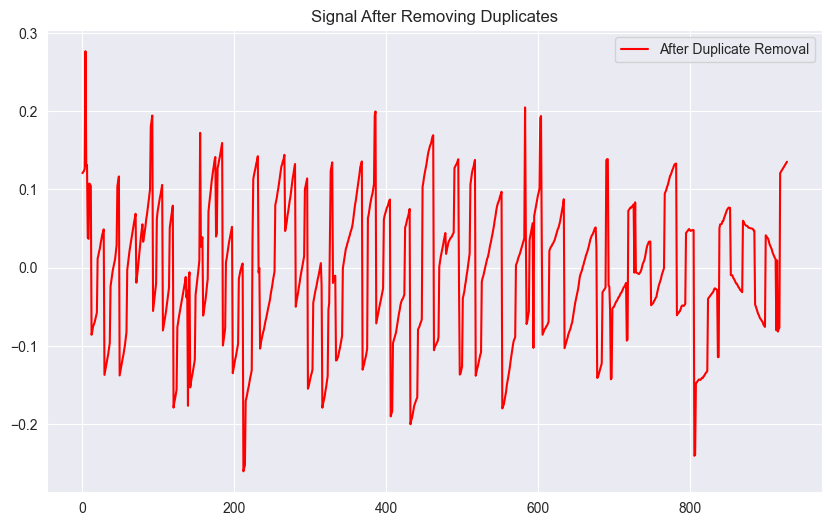

In [363]:

plt.figure(figsize=(10, 6))
plt.plot(time[:len(detrended_no_outliers)], detrended_no_outliers, label="After Duplicate Removal", color='red')
plt.title("Signal After Removing Duplicates")
plt.legend()
plt.show()


In [364]:
#                                                  MODELAREA 

In [365]:
print("Index data:", data.index.dtype)
print("Index detrended_no_outliers:", detrended_no_outliers.index.dtype)
data.index = pd.to_datetime(data.index)
detrended_no_outliers.index = pd.to_datetime(detrended_no_outliers.index)
common_index = data.index.intersection(detrended_no_outliers.index)
data.loc[common_index, 'wfv_2'] = detrended_no_outliers.loc[common_index]
data['wfv_2'] = data['wfv_2'].interpolate(method='linear')
print(data[['wfv_2']].head())
data.to_csv(r'C:\Users\alema\Desktop\AN3\SBC\PROIECT\RainGarden_Curatat.csv', index=True)

Index data: datetime64[ns]
Index detrended_no_outliers: int64
                         wfv_2
Time                          
2022-03-23 11:15:00  22.632761
2022-03-23 11:30:00  22.446199
2022-03-23 11:45:00  22.634226
2022-03-23 12:00:00  22.446199
2022-03-23 12:15:00  22.446199


               Model      RMSE       MAE  R² Score
0  Linear Regression  0.448530  0.313161  0.856287
1      Random Forest  1.613861  1.366420 -0.860564


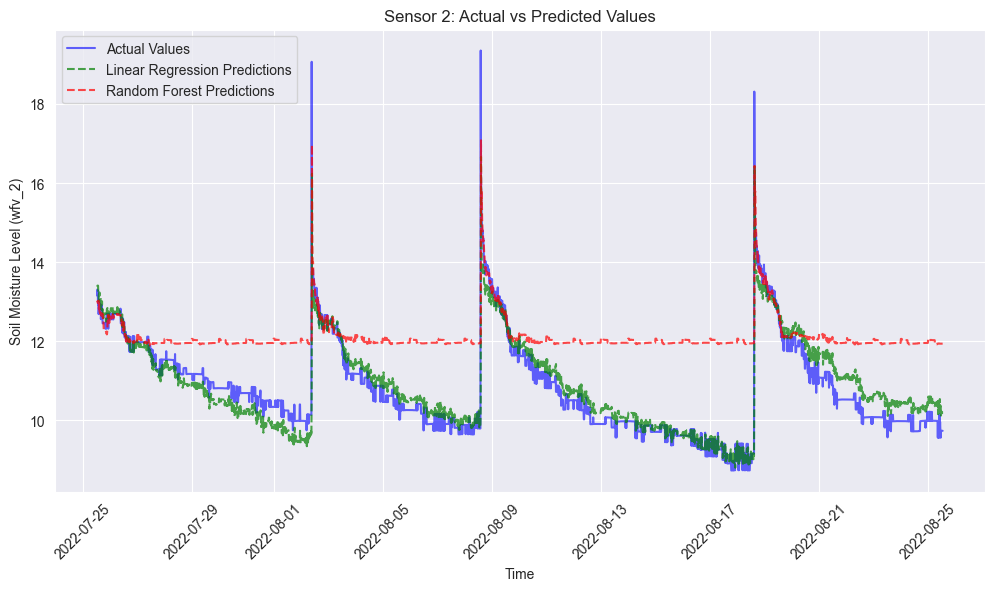

In [366]:
sensor_col = 'wfv_2'
data[sensor_col] = data[sensor_col].interpolate(method='linear')  # Ensure missing values are handled

# Creating time-based features
data['Hour'] = data.index.hour
data['Day'] = data.index.day
data['Month'] = data.index.month
data['Year'] = data.index.year

# Creating lag features (past values as predictors)
for lag in range(1, 6):  # Creating lag features for last 5 time steps
    data[f'{sensor_col}_lag{lag}'] = data[sensor_col].shift(lag)

# Drop NaN values after shifting
data.dropna(inplace=True)

# Splitting data into features (X) and target variable (y)
features = [col for col in data.columns if col != sensor_col]
X = data[features]
y = data[sensor_col]

# Train-test split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Model 2: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluating models
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'Model': model_name, 'RMSE': rmse, 'MAE': mae, 'R² Score': r2}

# Storing results
results = []
results.append(evaluate_model(y_test, y_pred_lr, 'Linear Regression'))
results.append(evaluate_model(y_test, y_pred_rf, 'Random Forest'))

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print(results_df)

# Plot Predictions vs Actual Values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Values", color='blue', alpha=0.6)
plt.plot(y_test.index, y_pred_lr, label="Linear Regression Predictions", color='green', linestyle='dashed', alpha=0.7)
plt.plot(y_test.index, y_pred_rf, label="Random Forest Predictions", color='red', linestyle='dashed', alpha=0.7)
plt.xlabel("Time")
plt.ylabel("Soil Moisture Level (wfv_2)")
plt.title("Sensor 2: Actual vs Predicted Values")
plt.legend()
plt.xticks(rotation=45)
plt.show()